In [1]:
import pandas as pd
import sqlite3
%matplotlib inline  
import numpy as np

conn = sqlite3.connect('factbook.db')
query = 'SELECT * FROM sqlite_master WHERE type=\'table\';'
pd.read_sql_query(query,conn)

/home/matiasconde/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory: 'uname'
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
query2= 'SELECT * FROM facts'
conn.execute(query2).fetchmany(5)

[(1,
  'af',
  'Afghanistan',
  652230,
  652230,
  0,
  32564342,
  2.32,
  38.57,
  13.89,
  1.51),
 (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3),
 (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92),
 (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0),
 (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46)]

In [3]:
pd.read_sql_query(query2,conn).head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [4]:
query3 = 'SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts'
pd.read_sql_query(query3,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [5]:
query4 = 'SELECT name, population FROM facts WHERE population=0'
pd.read_sql_query(query4,conn)

,name,population
0,Antarctica,0


In [6]:
query5 = 'SELECT name, population FROM facts WHERE population=(SELECT MAX(population) FROM facts)'
pd.read_sql_query(query5,conn)

,name,population
0,World,7256490011


#### In Antarctica there are no people registered as inhabitants.

#### There are 7,256,490,011 inhabitants in the world.

In [7]:
q6 = 'select id FROM facts WHERE population=0'
q7 = 'select id FROM facts WHERE population=7256490011'

print(pd.read_sql_query(q6,conn), pd.read_sql_query(q7,conn))

    id
0  250     id
0  261


In [8]:
df = pd.read_sql_query(query2,conn)
dataframe = df.loc[(df['id']!=250) & (df['id']!=261)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f408552a358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f408301d470>]], dtype=object)

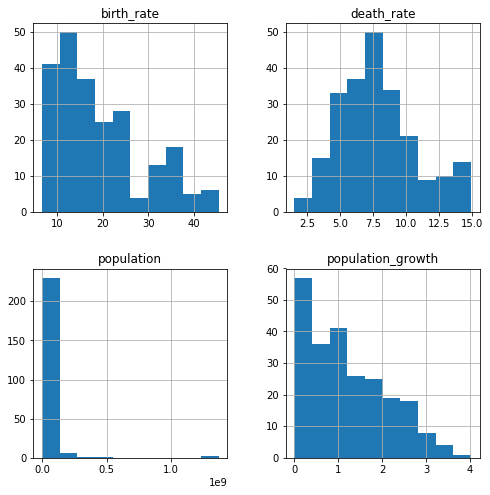

In [9]:
dataframe.hist(column=['population','population_growth','birth_rate','death_rate'],figsize=(8,8))

In [10]:
query_density = 'SELECT name, (CAST(population as Float)/CAST(area_land as Float)) FROM facts LIMIT 5;' 
pd.read_sql_query(query_density,conn)

,name,(CAST(population as Float)/CAST(area_land as Float))
0,Afghanistan,49.927697
1,Albania,110.565662
2,Algeria,16.602211
3,Andorra,182.863248
4,Angola,15.741841


In [19]:
query_density = 'SELECT name,population, area_land, ROUND(MAX(CAST(population as Float)/CAST(area_land as Float)),3) FROM facts LIMIT 5;' 
pd.read_sql_query(query_density,conn)
dataframe.copy()["population density"] = dataframe["population"] / dataframe["area_land"]

#### The place with the highest population density is MACAU (CHINA) 21,000 people per km2!

In [23]:
dataframe.copy()["population density"].replace([np.inf,-np.inf],np.nan, inplace=True)
pop_dens = dataframe["population density"].dropna()

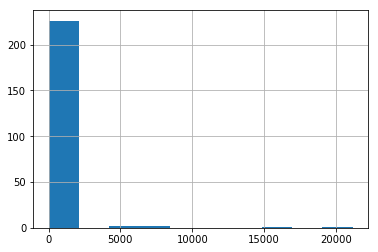

In [24]:
pop_dens.hist()

##### It seems that densities above 5000 inhabitants per km2 are very unusual, they all accumulate closer to 1000, let's see.

In [25]:
pop_dens_filtered = pop_dens.loc[pop_dens<1000]

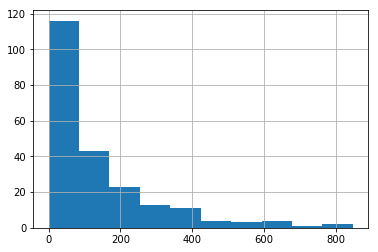

In [26]:
pop_dens_filtered.hist()

#### The graph seems to be more normal ... we are going to filter the densities above 1000 hab / km2.

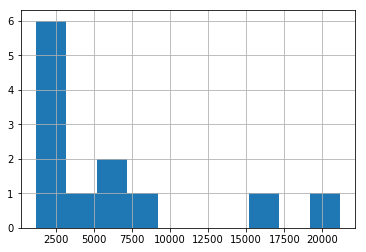

In [27]:
pop_dens_filtered = pop_dens.loc[pop_dens>1000]
pop_dens_filtered.hist()

In [32]:
dataframe.copy()["ratio_water_to_land"] = dataframe["area_water"]/dataframe["area_land"]

In [34]:
dataframe.copy()["ratio_water_to_land"].replace([np.inf, -np.inf,0],np.nan, inplace=True)

In [35]:
dataframe.copy()["ratio_water_to_land"].dropna(inplace=True)

In [37]:
dataframe[["name","ratio_water_to_land"]].sort_values(by="ratio_water_to_land",ascending=False).head(10)

,name,ratio_water_to_land
227,British Indian Ocean Territory,905.666667
246,Virgin Islands,4.520231
245,Puerto Rico,0.554791
11,"Bahamas, The",0.386613
70,Guinea-Bissau,0.284673
105,Malawi,0.259396
124,Netherlands,0.225710
181,Uganda,0.222922
55,Eritrea,0.164356
98,Liberia,0.156240
